#**Description: This program uses the three moving average crossover strategy to dermine when to buy and sell stock**

In [218]:
!pip3 install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
yf.pdr_override() 
import datetime as dt 
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')

#https://www.canva.com/design/DAEt1K1NLcE/i1HEuRTjXj-WK0kpMNOcuA/view?utm_content=DAEt1K1NLcE&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton

Load the data

**The magic happens here**. 
What is the period of time you want to analyse?

In [219]:
tick = yf.Ticker('AUDUSD%3DX') # ADA-USD # EURUSD%3DX # EURGBP%3DX # HG=F #CAKE
hist = tick.history(period='360d')['Close']

Show the data only two values


In [220]:
hist[-2:]

Date
2021-10-25    1062.199951
2021-10-26    1032.199951
Name: Close, dtype: float64

Visually see the data

<function matplotlib.pyplot.show>

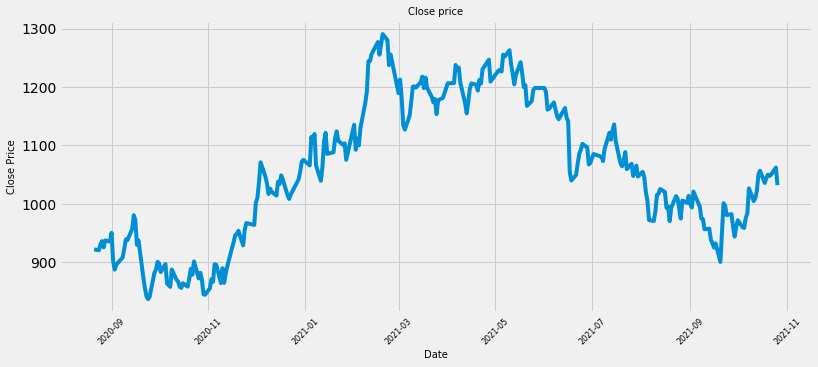

In [221]:
plt.figure(figsize=(12,5))
plt.title('Close price',fontsize = 10)
plt.plot(hist)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.show

Calculate the three moving averages,
Calculate the short / fast exponential moving average

**MAGIC IS HERE**

Be cautious because small periods create more signals but at the same time create more false positives. On the other hand, longer periods create fewer signals but you minimise your false positives. 

>> LONG TERM SIGNALS ANALYSIS (50,100,200) Fewer Falses positives

>> MEDIUM TERM SIGNALS ANALYSIS (25,50,100)

>> SHORT TERM SIGNALS ANALSYSIS (7,25,50) A lot Falses positives

Further reading: https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

In [222]:
short = 50
middle = 100
long1 =200

#short short/fast exponential moving average
ShortEMA = hist.ewm(span= short,adjust=False).mean()
# Middle/Medium exponential moving average
MiddleEMA = hist.ewm(span= middle,adjust=False).mean()
# long/slow exponential moving average
LongEMA = hist.ewm(span= long1,adjust=False).mean()

Visualize the graph

<function matplotlib.pyplot.show>

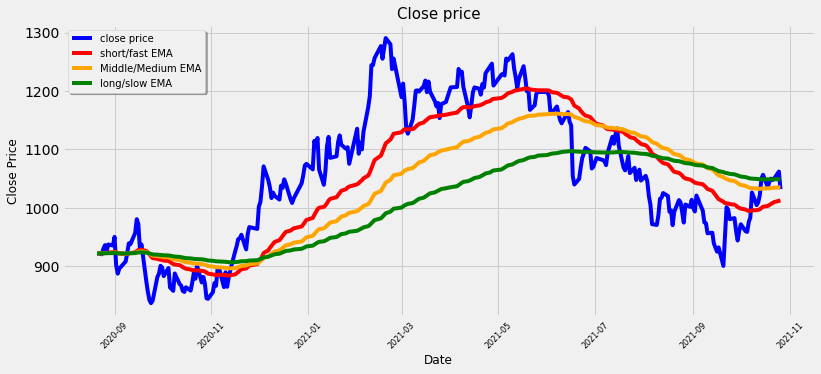

In [223]:
plt.figure(figsize=(12,5))
plt.title('Close price',fontsize = 15)
plt.plot(hist, label = 'close price', color='blue')
plt.plot(ShortEMA, label = 'short/fast EMA', color='red')
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label =  'long/slow EMA', color='green')
plt.legend(loc='upper left', shadow=True,fontsize = 10)

plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.show

Add the information to the a new dataframe

In [224]:
hist1 = pd.DataFrame(hist)

In [225]:
hist1['Short']= ShortEMA
hist1['Middle']= MiddleEMA
hist1['Long']= LongEMA

In [226]:
hist.head(2)

Date
2020-08-21    922.299988
2020-08-24    920.799988
Name: Close, dtype: float64

Create the function to buy and sell the stock


In [227]:
def buy_sell_function(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data ['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data ['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list, sell_list)



Add the buy and sell signals to the data set

In [228]:
hist1['Buy'] = buy_sell_function(hist1)[0]
hist1['Sell'] = buy_sell_function(hist1)[1]

Check visually in the graphic

<function matplotlib.pyplot.show>

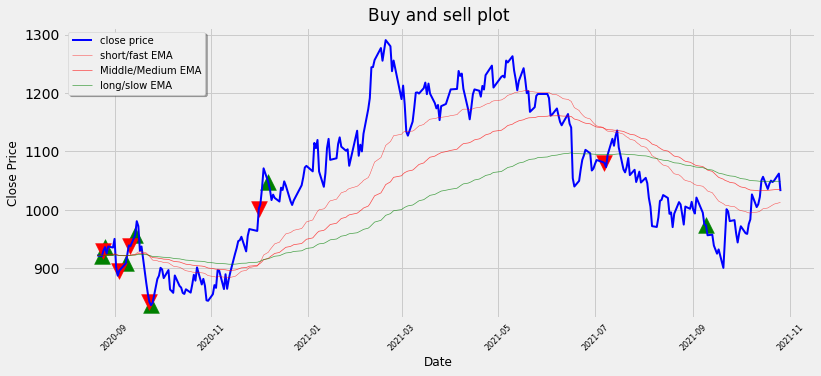

In [229]:
plt.figure(figsize=(12,5))
plt.title('Buy and sell plot',fontsize = 17)
plt.plot(hist, label = 'close price', color='blue', alpha = 1, linewidth = 2)
plt.plot(ShortEMA, label = 'short/fast EMA', color='red', alpha = 0.7, linewidth = 0.5)
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color='red', alpha = 0.7, linewidth = 0.7)
plt.plot(LongEMA, label =  'long/slow EMA', color='green', alpha = 0.7, linewidth = 0.7)
plt.scatter(hist.index, hist1['Buy'], color = 'green', marker = '^', alpha= 1, s = 250 )
plt.scatter(hist.index,hist1['Sell'], color = 'red', marker = 'v', alpha= 1, s =250)
plt.legend(loc='upper left', shadow=True,fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.show

In [230]:
hist1.describe()

,Close,Short,Middle,Long,Buy,Sell
count,286.000000,286.000000,286.000000,286.000000,7.000000,6.000000
mean,1051.895103,1044.138893,1032.369623,1007.842513,940.114275,948.266652
std,119.890569,106.301540,92.445357,72.604583,64.414233,83.261259
min,837.099976,884.372026,896.611657,907.072006,837.099976,842.299988
25%,956.800003,928.132384,923.990658,922.884739,914.600006,904.874985
50%,1047.750000,1040.510086,1046.639169,1031.538064,936.400024,934.299988
75%,1159.725037,1143.788828,1119.368439,1077.575979,965.449982,986.150009
max,1290.599976,1204.408992,1161.251555,1097.715983,1047.199951,1080.199951


Further Reading:

https://www.investopedia.com/terms/t/technical-analysis-of-stocks-and-trends.asp

https://www.investopedia.com/terms/m/movingaverage.asp